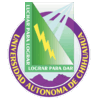

# Material Didáctico

## Similación de operaciones unitarias usando Python

##### Por: Gael David Chávez Uresti

# C2. Destilacion

## Descripción
### La destilación es un método para separar los componentes de una solución; depende de la distribución de las sustancias entre una fase gaseosa y una líquida, y se aplica a los casos en que todos los componentes están presentes en las dos fases.
###  McCabe y Thiele han desarrollado un método matemático gráfico para determinar el número de platos o etapas teóricas necesarios para la separación de una mezcla binaria A y B. Este método usa balances de materia con respecto a ciertas partes de la torre.
### El supuesto principal de este método consiste en que debe haber un derrame equimolar a través de la torre, entre la entrada de la alimentación y el plato superior y la entrada de alimentación y el plato inferior.

## Método McCabe-Thiele
### El balance total de material proporciona la expresión:
$ {V}_{n+1}+{L}_{n-1}={V}_{n}+{L}_{n}$ (3.4)
### La línea de operación de la sección de enriquecimiento es:
${y}_{n+1}=\displaystyle\frac{{L}_{n}}{{V}_{n+1}}{x}_{n}+\displaystyle\frac{{D}{x}_{D}}{{V}_{n+1}}$ (3.9)
### La ecuación remplazada con la relación de reflujo es la siguiente:
${y}_{n+1}=\displaystyle\frac{{R}}{{R+1}}{x}_{n}+\displaystyle\frac{{x}_{D}}{{R+1}}$ (3.10)
### La ecuación para el calor es la siguiente:
${q}=\displaystyle\frac{{H}_{y}-{H}_{f}}{{{H}_{y}-{H}_{L}}}$ (3.12)
### Después de una simplificación y combinación de terminos se representa de la siguiente manera:
${y}=\displaystyle\frac{{q}}{{q+1}}{x}-\displaystyle\frac{{x}_{F}}{{q-1}}$ (3.18)

# Ejemplo (Treybal pp. 525)

#### 1.-Se va a fraccionar la siguiente alimentación a 60 °C. 2 070 kN/m2 (300 lbr/in2) abs.,para que el producto destilado evaporado contenga 0.913% del isopentano y el residuo 0.284% del isobutanol
${CH}_{4}$=0.50 fracción mol
***
${C}_{3}{H}_{8}=0.03$
***
$i-{C}_{4}{H}_{10}=0.10$
***
$n-{C}_{4}{H}_{10}=0.15$
***
$i-{C}_{5}{H}_{12}=0.07$
***
$n-{C}_{5}{H}_{12}=0.05$
***
$n-{C}_{6}{H}_{14}=0.10$
***
#### Calcule:
#### a) La relación de reflujo mínimo
#### b) El número mínimo de platos
#### c) En la relación de reflujo = 2.0, calcule la composición del producto

# Programa

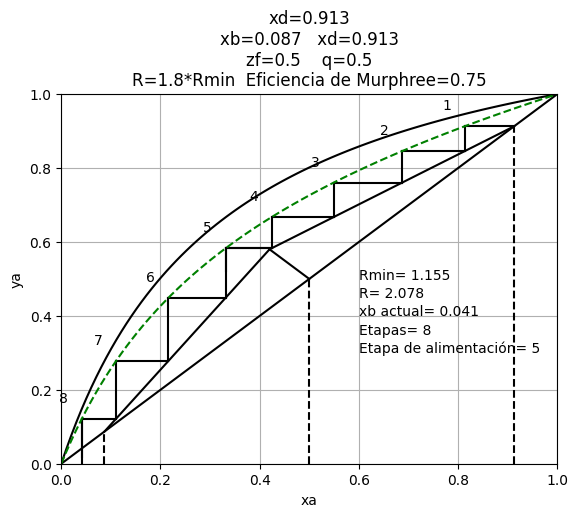

In [10]:
#Codigo creado por Tom Savage (trsav) https://github.com/trsav/mccabe-thiele/tree/master

import numpy as np
import matplotlib.pyplot as plt


def eq_og(xa,relative_volatility):
    '''
    DESCRIPCIÓN
    Regresa datos de equilibrio de una entrada
    de composición liquida (xa) y la volatilidad relativa

    Entradas:
    xa                      : Composición Liquida
    relative_volatility     : Volatilidad Relativa

    Salidas:
    ya                      : Composición del Vapor
    '''
    ya=(relative_volatility*xa)/(1+(relative_volatility-1)*xa)
    # ya encontrado utilizando las leyes de Raoult y Dalton
    return ya

def eq(xa,relative_volatility,nm):
    '''
    DESCRIPCIÓN
    Regresa datos de equilibrio de una entrada
    de composición liquida (xa) y volatilidad relativa
    tomando en cuenta la eficiencia de Murphree del
    sistema.

    Entradas:
    xa                      : Composición Liquida
    relative_volatility     : Volatilidad Relativa
    nm                      : Eficiencia de Murphree

    Salidas:
    ya                      : Composición del Vapor
    '''
    ya=(relative_volatility*xa)/(1+(relative_volatility-1)*xa)
    # ya encontrado utilizando las leyes de Raoult y Dalton
    ya=((ya-xa)*nm)+xa # Usando la definición de la eficiencia de Murphree
    return ya

def eq2(ya,relative_volatility,nm):
    '''
    DESCRIPCIÓN
    Regresa datos de equilibrio de una entrada
    de composición líquida (ya) y volatilidad relativa
    tomando en cuenta la eficiencia de Murphree del
    sistema. Esta función es la inversa de la ecuación de arriba.

    Entradas:
    ya                      : Composición del Vapor
    relative_volatility     : Volatilidad Relativa
    nm                      : Eficiencia de Murphree

    Salidas:
    xa                      : Composición del líquido
    '''
    # Inversa de la ecuación toma forma cuadratica
    a=((relative_volatility*nm)-nm-relative_volatility+1)
    b=((ya*relative_volatility)-ya+nm-1-(relative_volatility*nm))
    c=ya
    xa=(-b-np.sqrt((b**2)-(4*a*c)))/(2*a) # Resolver cuadratica utilizando
                                          # formula cuadratica
    return xa

def stepping_ESOL(x1,y1,relative_volatility,R,xd):
    '''
    DESCRIPCIÓN:
    Realiza un solo paso sobre la
    linea de operación

    Entradas:
    x1                      : Composición liquida inicial
    y1                      : Composicón del vapor inicial
    relative_volatility     : Volatilidad Relativa
    R                       : Relación de Reflujo
    xd                      : Composición del destilado

    Salidas:
    x1      : Composición líquida inicial
    x2      : Composición líquida después del paso
    y1      : Composición del vapor inicial
    y2      : Composición del vapor después del paso

    '''
    x2=eq2(y1,relative_volatility,nm) #Calculando la nueva composición líquida
    y2=(((R*x2)/(R+1))+(xd/(R+1))) #Ecuación del balance
    return x1,x2,y1,y2

def stepping_SSOL(x1,y1,relative_volatility,\
ESOL_q_x,ESOL_q_y,xb):
    '''
    DESCRIPCIÓN:
    Realiza un solo paso sobre la
    linea de operación

    Entradas:
    x1                      : Composición líquida inicial
    y1                      : Composición del vapor inicial
    relative_volatility     : Volatilidad relativa
    ESOL_q_x                : Punto en el que la ecuación intersecta la linea-q (x)
    ESOL_q_y                : Punto en el que la ecuación intersecta la linea-q (y)
    xb                      : Composición del fondo

    Salidas:
    x1      : Composición líquida inicial
    x2      : Composición líquida después del paso
    y1      : Composición del vapor inicial
    y2      : Composición del vapor después del paso

    '''
    x2=eq2(y1,relative_volatility,nm) # Calculando la nueva composición líquida
    m=((xb-ESOL_q_y)/(xb-ESOL_q_x)) # Gradiente de la gráfica
    c=ESOL_q_y-(m*ESOL_q_x) # Intercepción de la gráfica
    y2=(m*x2)+c # Solucionar ecuación en la forma 'y=mx+c'
    return x1,x2,y1,y2

def McCabeThiele(PaVap,PbVap,R_factor,xf,xd,xb,q,nm):
    '''
    DESCRIPCIÓN:
    Realiza la construcción por medio del método de McCabe-Thiele
    para calcular el número optimo de pasos, y el plato optimo de
    alimentación. Tomando en cuenta la eficiencia de Murphree del
    sistema.

    Entradas:
    PaVap       :Presión de vapor del componente a (más volatil)
    PbVap       :Presión de vapor del componente b (menos volatile)
    R_factor    :Cantidad por la que se multiplica Tmin para obtener la relación de reflujo real
    xf          :Composición de alimentación
    xd          :Composición del destilado
    xb          :Composición del fondo(residuos)
    q           :fracción líquida de alimentación
    nm          :Eficiencia de Murphree

    Salidas:
    Un grafico de McCabe-Thiele, enseñando el número de etapas de equilibrio,
    entrada optima de alimentación, relación de reflujo real, composición del
    fondo real.
    '''
    # Asegurandose que no haya un error por división de 0
    if q==1:
        q-=0.00000001
    if q==0:
        q+=0.00000001

    relative_volatility=PaVap/PbVap #Obteniendo volatilidad relativa por definición
    xa=np.linspace(0,1,100) #Creando el eje c
    ya_og=eq_og(xa[:],relative_volatility) #Consiguiendo datos originales de equilibrio
    ya_eq=eq(xa[:],relative_volatility,nm) #Consiguiendo datos modificados de equilibrio
    # Tomando en cuenta le eficiencia de Murhpree

    x_line=xa[:] #Creando puntos de guardado para la linea y=x
    y_line=xa[:]

    # Encontrando donde la linea q se intersecta con la curva de equilibrio
    # Toma forma de una ecuación cuadratica
    al=relative_volatility
    a=((al*q)/(q-1))-al+(al*nm)-(q/(q-1))+1-nm
    b=(q/(q-1))-1+nm+((al*xf)/(1-q))-(xf/(1-q))-(al*nm)
    c=xf/(1-q)

    if q>1:
        q_eqX=(-b+np.sqrt((b**2)-(4*a*c)))/(2*a)
    else:
        q_eqX=(-b-np.sqrt((b**2)-(4*a*c)))/(2*a)
    # Donde la linea q intersecta la curva de equilibrio (eje x)
    q_eqy=eq(q_eqX,relative_volatility,nm)
    # Donde la linea q intersecta la curva de equilibrio (eje y)

    theta_min=xd*(1-((xd-q_eqy)/(xd-q_eqX))) # Intersección en y para obtener Rmin
    R_min=(xd/theta_min)-1 # Encontrando Rmin
    R=R_factor*R_min # Multiplicado por R_factor para obtener R
    theta=(xd/(R+1)) # Encontrando nueva intersección en y

    ESOL_q_x=((theta-(xf/(1-q)))/((q/(q-1))-((xd-theta)/xd)))
    # Donde la nueva linea the equilibrio intersecta la linea q (eje x)
    ESOL_q_y=(ESOL_q_x*((xd-theta)/xd))+theta
    # Donde la nueva linea the equilibrio intersecta la linea q (eje y)


    plt.figure() # El siguiente codigo gráfica el diagrama McCabe-Thiele
    plt.axis([0,1,0,1]) #Creando ejes entre 0-1
    plt.plot([xd,xd],[0,xd],color='k',linestyle='--') # Linea de composición del destilado
    plt.plot([xb,xb],[0,xb],color='k',linestyle='--') # Linea de composición del fondo
    plt.plot([xf,xf],[0,xf],color='k',linestyle='--') # Linea de composición de la alimentación

    #plt.plot([xd,0],[xd,theta_min],color='r',linestyle='--') # Linea de equilibrio a Rmin

    plt.plot([xd,ESOL_q_x],[xd,ESOL_q_y],color='k') # Linea de equilibrio a R
    plt.plot([xb,ESOL_q_x],[xb,ESOL_q_y],color='k') # Gráfica

    x1,x2,y1,y2=stepping_ESOL(xd,xd,relative_volatility,R,xd)
    step_count=1 # Número actual de etapas de equilibrio
    plt.plot([x1,x2],[y1,y1],color='k') # Paso 1
    plt.plot([x2,x2],[y1,y2],color='k') # Paso 2
    plt.text(x2-0.045,y1+0.045,step_count)
    while x2>ESOL_q_x: # arriba hasta la linea de q, luego abajo
        x1,x2,y1,y2=stepping_ESOL(x2,y2,relative_volatility,R,xd)
        plt.plot([x1,x2],[y1,y1],color='k')
        plt.plot([x2,x2],[y1,y2],color='k')
        step_count+=1 # Incrementando la cuenta del equlibrio
        plt.text(x2-0.045,y1+0.045,step_count) # nombrar el paso

    feed_stage=step_count # Obteniendo el paso optimo de alimentación
    x1,x2,y1,y2=stepping_SSOL(x1,y1,relative_volatility\
    ,ESOL_q_x,ESOL_q_y,xb)
    plt.plot([x1,x2],[y1,y1],color='k')
    plt.plot([x2,x2],[y1,y2],color='k')
    step_count+=1
    while x2>xb: # Cuando la composición es mayor que la requerida
        x1,x2,y1,y2=stepping_SSOL(x2,y2,relative_volatility\
        ,ESOL_q_x,ESOL_q_y,xb)
        # Continua los pasos
        plt.plot([x1,x2],[y1,y1],color='k')
        plt.plot([x2,x2],[y1,y2],color='k')
        plt.text(x2-0.045,y1+0.045,step_count) # Nombrar paso
        step_count+=1 # Incrementar la cuenta de pasos de equilibrio
    plt.plot([x2,x2],[y1,0],color='k')
    xb_actual=x2
    stages=step_count-1
    plt.plot(x_line,y_line,color='k') # Linea x=y
    plt.plot(xa,ya_og,color='k') # Curva de equilibrio
    plt.plot(xa,ya_eq,color='g',linestyle='--') # Curva de equlibrio (con eficiencia)
    plt.plot([xf,ESOL_q_x],[xf,ESOL_q_y],color='k') #linea q

    #plt.plot([ESOL_q_x,q_eqX],[ESOL_q_y,q_eqy],color='r',linestyle='--') #linea q

    plt.xlabel('xa') #Algunos nombres e información de la gráfica
    plt.ylabel('ya')
    plt.text(0.6,0.5,'Rmin= '+str(round(R_min,3)))
    plt.text(0.6,0.45,'R= '+str(round(R,3)))
    plt.text(0.6,0.4,'xb actual= '+str(round(xb_actual,3)))
    plt.text(0.6,0.35,'Etapas= '+str(stages))
    plt.text(0.6,0.3,'Etapa de alimentación= '+str(feed_stage))
    plt.title('xd='+str(xd)+'\n'+\
    'xb='+str(xb)+\
    '   xd='+str(xd)+'\n'+\
    'zf='+str(xf)+\
    '    q='+str(round(q,3))+'\n'+\
    'R='+str(R_factor)+'*Rmin'+\
    '  Eficiencia de Murphree='+str(nm))
    plt.grid(True) # Pone las cuadriculas
    plt.show()
    return


'''Parametros'''

PaVap=300    # Presión de vapor de a
PbVap=74.3     # Presión de vapor de b
xd=0.913     # Composición del destilado
xb=0.087      # Composición del fondo
xf=0.5         # Composición de la alimentación
q=0.5          # q
R_factor=1.8   # Relación de reflujo = R_min* R_factor
nm=0.75       #Eficiencia de Murphree


McCabeThiele(PaVap,PbVap,R_factor,xf,xd,xb,q,nm)